Thanks to https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools?utm_source=medium&utm_medium=crosspost&utm_campaign=blog-exploratory-data-analysis-natural-language-processing-tools

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [54]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.9MB/s 
     |████████████████████████████████| 552kB 22.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9597b7f6d034fd856f400f8aef7b314f7620a99f0492ab002da563a309dd8836
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=ee9616fbcdc74f4babde7c05b57894eeac397746b1f68c4d2ffb83fc5f060587
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim

In [6]:
news= pd.read_csv('abcnews-date-text.csv',nrows=10000)
news.head(3)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit


In [0]:
TEXT_COLUMN = 'headline_text'
text = news[TEXT_COLUMN]

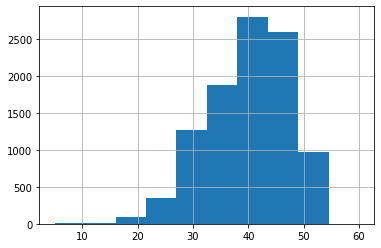

In [11]:
news['headline_text'].str.len().hist()

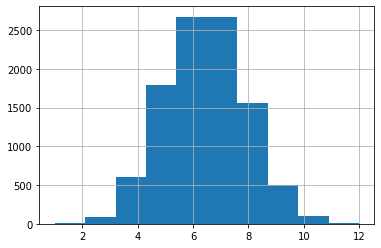

In [12]:
text.str.split().\
    map(lambda x: len(x)).\
    hist()

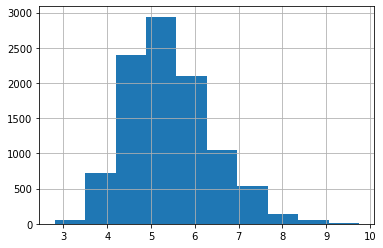

In [13]:
news['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [25]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
corpus=[]
new= news['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [0]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

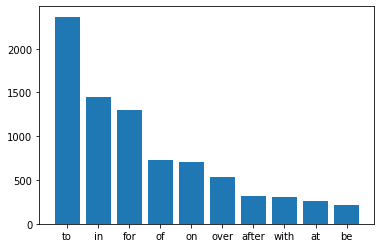

In [31]:
plot_top_stopwords_barchart(news['headline_text'])

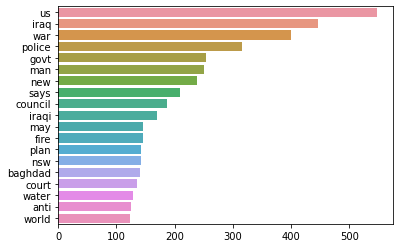

In [40]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## Ngram exploration

In [41]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [42]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],3))

[('I', 'went', 'to'),
 ('went', 'to', 'the'),
 ('to', 'the', 'river'),
 ('the', 'river', 'bank')]

In [0]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

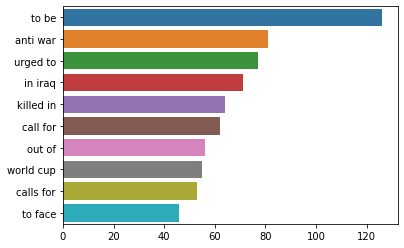

In [46]:
top_n_bigrams=get_top_ngram(news['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [0]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

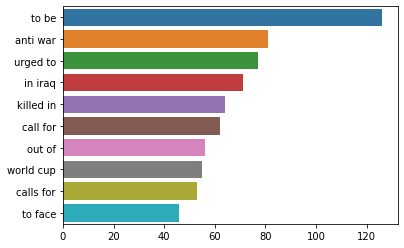

In [48]:
plot_top_ngrams_barchart(news['headline_text'],2)

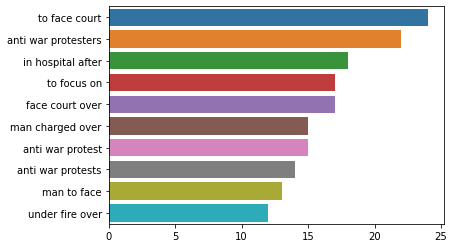

In [49]:
plot_top_ngrams_barchart(news['headline_text'],3)

## Topic Modeling exploration with pyLDAvis

In [50]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['headline_text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(news)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [52]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.017*"war" + 0.017*"iraq" + 0.011*"man" + 0.007*"plan" + 0.007*"fire" + 0.006*"say" + 0.006*"face" + 0.005*"govt" + 0.005*"charged" + 0.004*"call"'),
 (1,
  '0.011*"police" + 0.009*"iraqi" + 0.008*"troop" + 0.007*"win" + 0.007*"claim" + 0.006*"council" + 0.005*"australian" + 0.005*"sars" + 0.005*"woman" + 0.004*"war"'),
 (2,
  '0.012*"govt" + 0.008*"war" + 0.006*"iraqi" + 0.005*"new" + 0.005*"anti" + 0.005*"water" + 0.004*"attack" + 0.004*"urged" + 0.004*"get" + 0.004*"dy"'),
 (3,
  '0.009*"iraq" + 0.008*"baghdad" + 0.007*"world" + 0.007*"cup" + 0.006*"new" + 0.006*"say" + 0.006*"death" + 0.005*"hit" + 0.005*"police" + 0.005*"dead"')]

In [56]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.058918  0.006514       1        1  26.923157
3      0.167784 -0.075596       2        1  24.927353
2     -0.118047 -0.097724       3        1  24.604618
1      0.009181  0.166806       4        1  23.544872, topic_info=    Category        Freq   Term       Total  loglift  logprob
188  Default  216.000000   govt  216.000000  30.0000  30.0000
49   Default  385.000000    war  385.000000  29.0000  29.0000
766  Default   84.000000    cup   84.000000  28.0000  28.0000
79   Default  127.000000  troop  127.000000  27.0000  27.0000
317  Default  202.000000    man  202.000000  26.0000  26.0000
..       ...         ...    ...         ...      ...      ...
16    Topic4   33.130428   aust   72.183807   0.6675  -5.8929
43    Topic4   43.364227   iraq  422.601868  -0.8305  -5.6237
8     Topic4   34.392487   fire  152.217773  -0.0412  -5.8555
254   Topic4   33.363266   back  116.198883   0.1984  -5.8859
507   Topic4   33.066536    may  138.146393   0.0165  -5.8948

[290 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
749       4  0.981439  abattoir
6797      4  0.953736       adf
3235      1  0.094176   advance
3235      2  0.784798   advance
3235      4  0.094176   advance
...     ...       ...       ...
488       4  0.163559     world
1352      1  0.015883      year
1352      2  0.365307      year
1352      3  0.015883      year
1352      4  0.603550      year

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [0]:
# def get_lda_objects(text):
#     nltk.download('stopwords')    
#     stop=set(stopwords.words('english'))

    
#     def _preprocess_text(text):
#         corpus=[]
#         stem=PorterStemmer()
#         lem=WordNetLemmatizer()
#         for news in text:
#             words=[w for w in word_tokenize(news) if (w not in stop)]

#             words=[lem.lemmatize(w) for w in words if len(w)>2]

#             corpus.append(words)
#         return corpus
    
#     corpus=_preprocess_text(text)
    
#     dic=gensim.corpora.Dictionary(corpus)
#     bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
#     lda_model =  gensim.models.LdaMulticore(bow_corpus, 
#                                    num_topics = 4, 
#                                    id2word = dic,                                    
#                                    passes = 10,
#                                    workers = 2)
    
#     return lda_model, bow_corpus, dic

# def plot_lda_vis(lda_model, bow_corpus, dic):
#     pyLDAvis.enable_notebook()
#     vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
#     return vis

In [0]:
# lda_model, bow_corpus, dic = get_lda_objects(news['headline_text'])

In [0]:
# lda_model.show_topics()

## Wordcloud

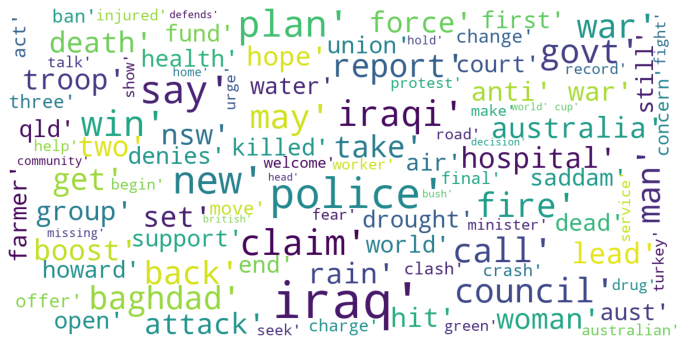

In [57]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

## Sentiment analysis

### Textblob 

In [58]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

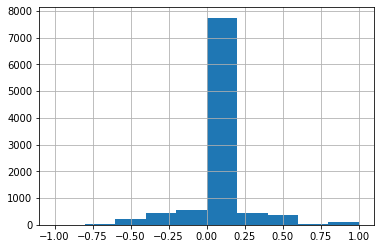

In [59]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

news['polarity_score']=news['headline_text'].\
   apply(lambda x : polarity(x))
news['polarity_score'].hist()

<BarContainer object of 3 artists>

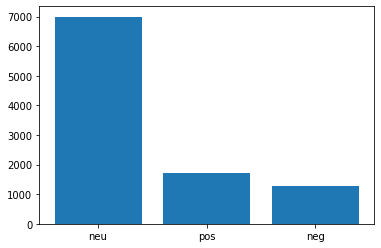

In [60]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
news['polarity']=news['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(news.polarity.value_counts().index,
        news.polarity.value_counts())

In [61]:
news[news['polarity']=='pos']['headline_text'].head()

1     act fire witnesses must be aware of defamation
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
18        bryant leads lakers to double overtime win
26      commonwealth bank cuts fixed home loan rates
Name: headline_text, dtype: object

In [62]:
news[news['polarity']=='neg']['headline_text'].head()

7     aussie qualifier stosur wastes four memphis match
23               carews freak goal leaves roma in ruins
28     council chief executive fails to secure position
34                   dargo fire threat expected to rise
40        direct anger at govt not soldiers crean urges
Name: headline_text, dtype: object

### Vader Sentiment Analysis

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<BarContainer object of 3 artists>

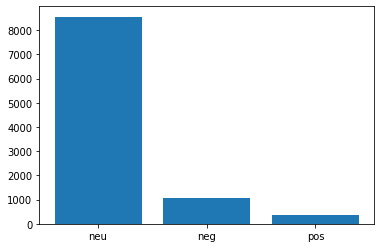

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

news['polarity']=news['headline_text'].\
    map(lambda x: get_vader_score(x))
polarity=news['polarity'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

### Named Entity Recognition

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [65]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'),
 ('Iran', 'GPE'),
 ('Chabahar', 'PERSON'),
 ('Thursday', 'DATE')]

In [66]:
from spacy import displacy

displacy.render(doc, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    India\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n and \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Iran\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n have agreed to boost the economic viability of the strategic \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Chabahar\n    <span style="font-size: 0.8em; font-weight: bold; line-h

In [0]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=news['headline_text'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

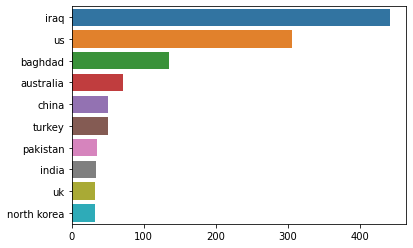

In [68]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=news['headline_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

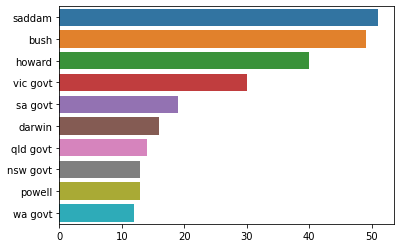

In [69]:
per=news['headline_text'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

### Parts of Speach Tagging

In [74]:
import nltk
nltk.download('averaged_perceptron_tagger')
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [75]:
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

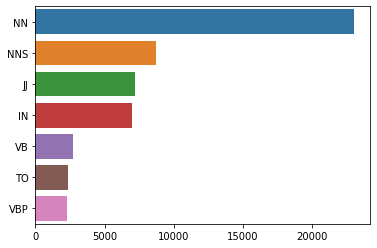

In [76]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=news['headline_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

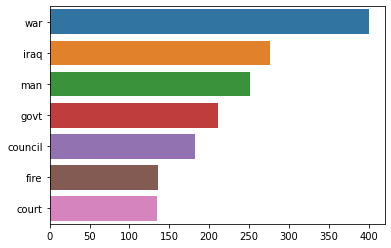

In [77]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


words=news['headline_text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

### Text complexity

     |████████████████████████████████| 3.0MB 4.2MB/s 


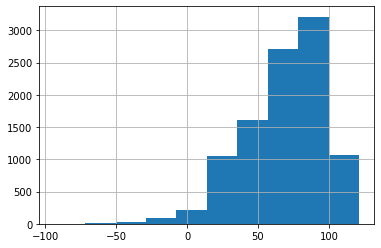

In [79]:
!pip install textstat
from textstat import flesch_reading_ease

news['headline_text'].\
   apply(lambda x : flesch_reading_ease(x)).hist()

In [0]:
# x=[i for i in range(len(reading)) if reading[i]<5]
# news.iloc[x]['headline_text'].head()